# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
#-*- coding: utf-8 -*-
from utils import get_dataset
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib inline

In [2]:
dataset = get_dataset("data/training_and_validation/segment-1146261869236413282_1680_000_1700_000_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/training_and_validation/segment-1146261869236413282_1680_000_1700_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/training_and_validation/segment-1146261869236413282_1680_000_1700_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    name  = batch["filename"]
    image = batch["image"].numpy()
    boxes = batch["groundtruth_boxes"].numpy()
    classes = batch["groundtruth_classes"].numpy()
    
    print('file name: {}'.format(name))
    print('image shape: {}'.format(image.shape))
    print('# of boxes: {}'.format(len(boxes)))
    print('# of objects: {}'.format(len(classes)))
    
    _, ax = plt.subplots(1, figsize=(20, 10))
    
    #color mapping of classes
    colorMap = {1: 'red',   # vehicles
                2: 'blue',  # pedestrians
                4: 'green'} # cyclist
    
    for cls, box in zip(classes, boxes):
        y1, x1, y2, x2 = box
        y1 = y1*image.shape[0]
        x1 = x1*image.shape[1]
        y2 = y2*image.shape[0]
        x2 = x2*image.shape[1]
        rec = Rectangle((x1, y1), x2-x1, y2-y1,
                  facecolor='none',
                  edgecolor=colorMap[cls])
        ax.add_patch(rec)
    ax.imshow(image)
    
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_90.tfrecord'
image shape: (640, 640, 3)
# of boxes: 19
# of objects: 19


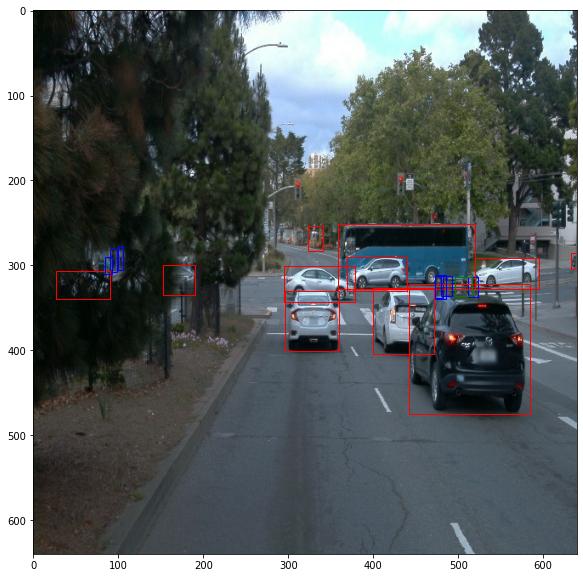

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_150.tfrecord'
image shape: (640, 640, 3)
# of boxes: 33
# of objects: 33


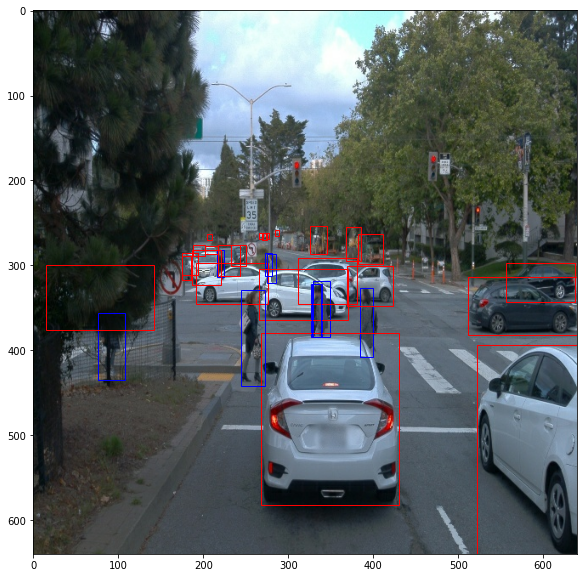

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_30.tfrecord'
image shape: (640, 640, 3)
# of boxes: 32
# of objects: 32


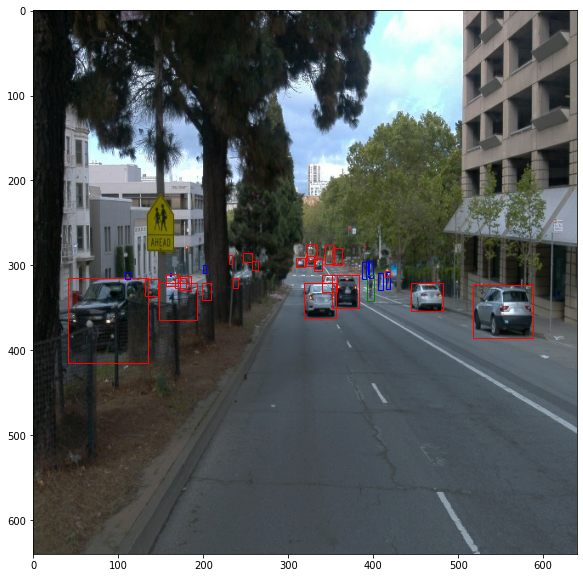

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_100.tfrecord'
image shape: (640, 640, 3)
# of boxes: 20
# of objects: 20


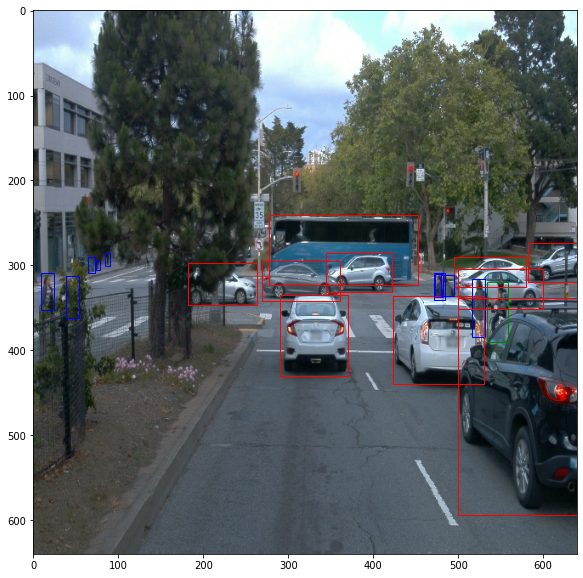

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_120.tfrecord'
image shape: (640, 640, 3)
# of boxes: 25
# of objects: 25


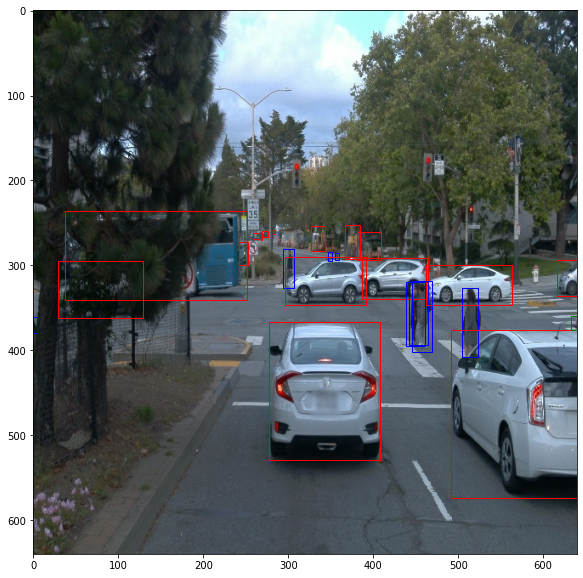

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_190.tfrecord'
image shape: (640, 640, 3)
# of boxes: 35
# of objects: 35


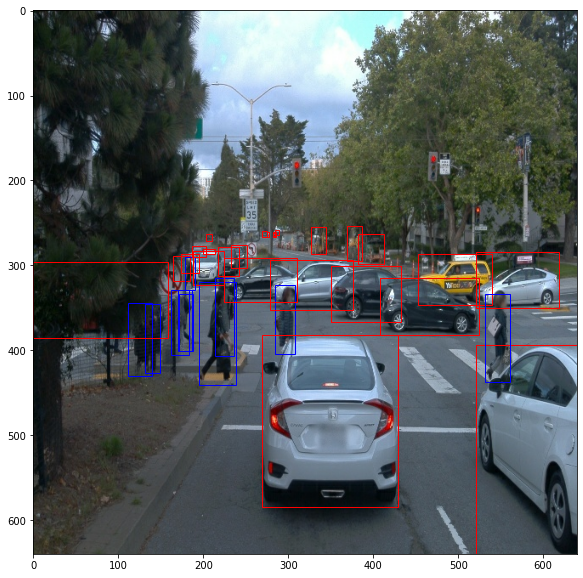

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_90.tfrecord'
image shape: (640, 640, 3)
# of boxes: 19
# of objects: 19


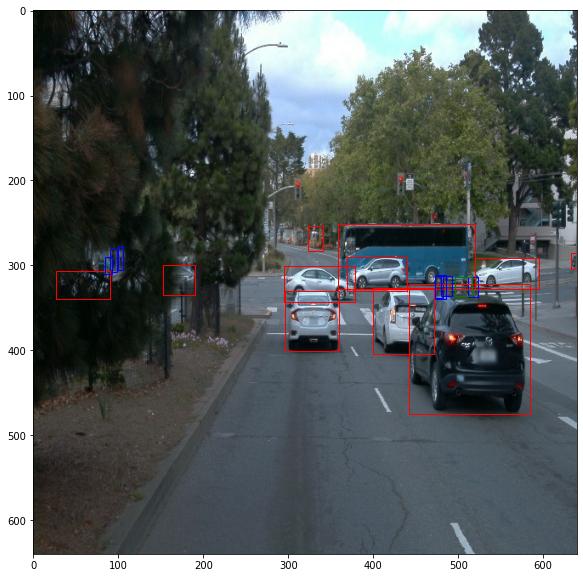

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_120.tfrecord'
image shape: (640, 640, 3)
# of boxes: 25
# of objects: 25


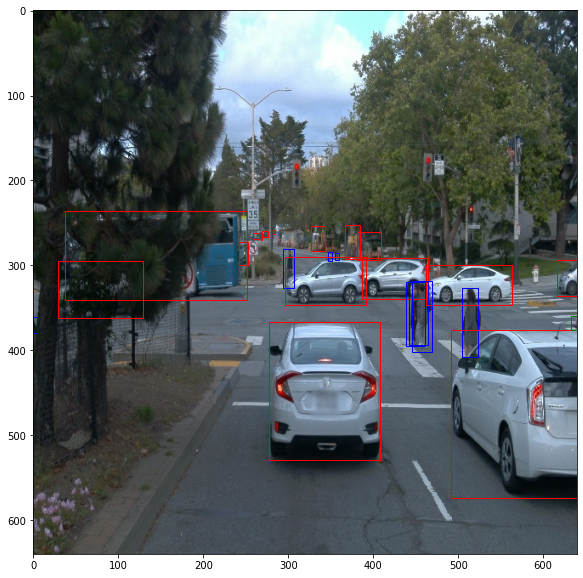

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_160.tfrecord'
image shape: (640, 640, 3)
# of boxes: 36
# of objects: 36


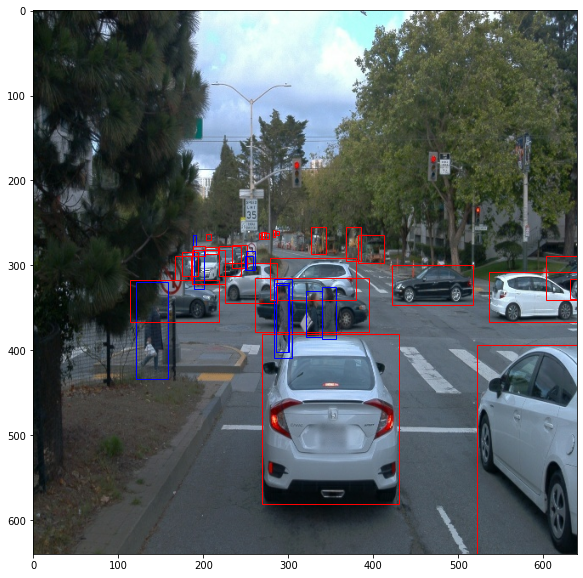

file name: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_180.tfrecord'
image shape: (640, 640, 3)
# of boxes: 36
# of objects: 36


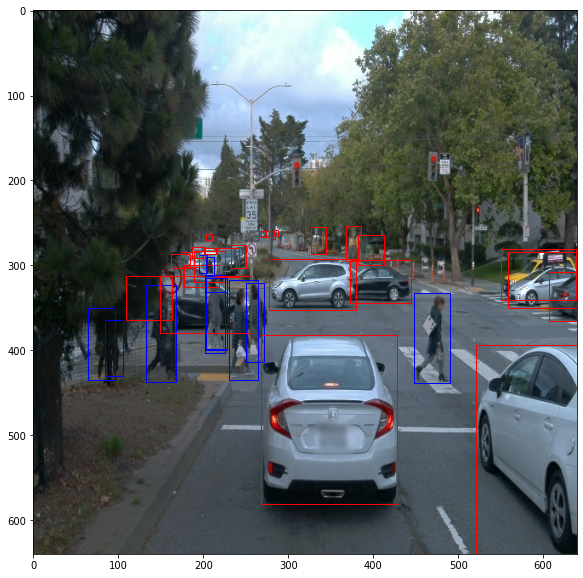

In [4]:
## STUDENT SOLUTION HERE
## shuffle dataset and display 10 images
for batches in dataset.shuffle(1).take(10):
    display_instances(batches)


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
# Loading all tfrecords
dataset = get_dataset("data/training_and_validation/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97


In [6]:
def area_type(area):
    if area <= 32*32:
        return 0 # Small
    elif 32*32 < area and area <= 96*96:
        return 1 # Medium
    elif 96*96 < area:
        return 2 # Large

In [7]:
def data_distribution_instances():
    cntVehicles = 0
    cntPedestrians = 0
    cntCyclist = 0

    # Small: Area <= 32^2, Medium: 32^2 <  Area <= 96^2, Large: 96^2 <  Area
    cntVehiclesSize = [0, 0, 0] #[Small, Medium, Large]
    cntPedestriansSize = [0, 0, 0]
    cntCyclistSize = [0, 0, 0]
    
    for batch in dataset.shuffle(1).take(1000):
        image = batch["image"].numpy()
        objects = batch["groundtruth_classes"].numpy()
        boxes = batch["groundtruth_boxes"].numpy()
        
        for obj, box in zip(objects, boxes):
            y1, x1, y2, x2 = box
            area = (x2-x1)*image.shape[1]*(y2-y1)*image.shape[0]
            
            #count
            if obj == 1:
                cntVehicles += 1
                cntVehiclesSize[area_type(area)] += 1
            elif obj == 2:
                cntPedestrians += 1
                cntPedestriansSize[area_type(area)] += 1
            elif obj == 4:
                cntCyclist += 1
                cntCyclistSize[area_type(area)] += 1
    
    # variables for plot
    classes = ['Vehicle', 'Pedestrian', 'Cyclist']
    cntObject = [cntVehicles, cntPedestrians, cntCyclist]
    colorOfClass = ['red', 'blue', 'green']
    
    sizes = ['Small', 'Medium', 'Large']
    colorOfSize = ['orange', 'magenta', 'purple']
    
    explodeCoef = [0.1, 0.2, 0.2]
    
    # Classes
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
    fig.suptitle('Classes',fontweight="bold")
    # plot histgram
    x = np.arange(len(classes))
    ax0.bar(x, cntObject, color = colorOfClass)
    plt.sca(ax0)
    plt.xticks(x, classes)
    ax0.set(xlabel='Classes', ylabel='Number of objects')
    # plot pie
    ax1.title.set_text('Classes')
    ax1.pie(cntObject, labels = classes, colors = colorOfClass, explode = explodeCoef, shadow = True, autopct = '%1.1f%%')
    plt.show()
    
    # Vehicle
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
    fig.suptitle('Vehicle',fontweight="bold")
    # plot histgram
    x = np.arange(len(cntVehiclesSize))
    ax0.bar(x, cntVehiclesSize, color = colorOfSize)
    plt.sca(ax0)
    plt.xticks(x, sizes)
    ax0.set(xlabel='Sizes', ylabel='Number of Vehicles')
    # plot pie
    ax1.title.set_text('Vehicle Sizes')
    ax1.pie(cntVehiclesSize, labels = sizes, colors = colorOfSize, explode = explodeCoef, shadow = True, autopct = '%1.1f%%')
    plt.show()
    
    # Pedestrian
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
    fig.suptitle('Pedestrian',fontweight="bold")
    # plot histgram
    x = np.arange(len(cntPedestriansSize))
    ax0.bar(x, cntPedestriansSize, color = colorOfSize)
    plt.sca(ax0)
    plt.xticks(x, sizes)
    ax0.set(xlabel='Sizes', ylabel='Number of Pedestrians')
    # plot pie
    ax1.title.set_text('Pedestrian Sizes')
    ax1.pie(cntPedestriansSize, labels = sizes, colors = colorOfSize, explode = explodeCoef, shadow = True, autopct = '%1.1f%%')
    plt.show()
    
    # Cyclist
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
    fig.suptitle('Cyclist',fontweight="bold")
    # plot histgram
    x = np.arange(len(cntCyclistSize))
    ax0.bar(x, cntCyclistSize, color = colorOfSize)
    plt.sca(ax0)
    plt.xticks(x, sizes)
    ax0.set(xlabel='Sizes', ylabel='Number of Cyclists')
    # plot pie
    ax1.title.set_text('Cyclist Sizes')
    ax1.pie(cntCyclistSize, labels = sizes, colors = colorOfSize, explode = explodeCoef, shadow = True, autopct = '%1.1f%%')
    plt.show()

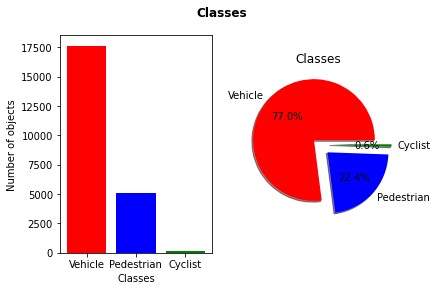

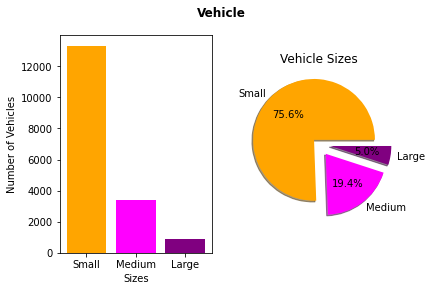

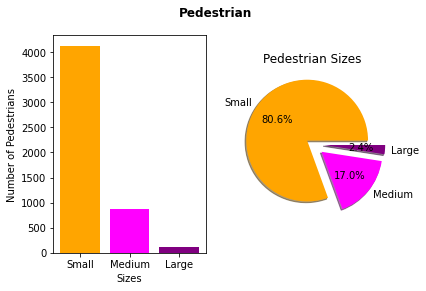

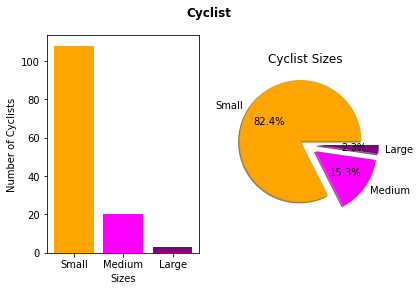

In [8]:
# data distribution
data_distribution_instances()